In [212]:
import xarray as xr
import matplotlib.pyplot as plt

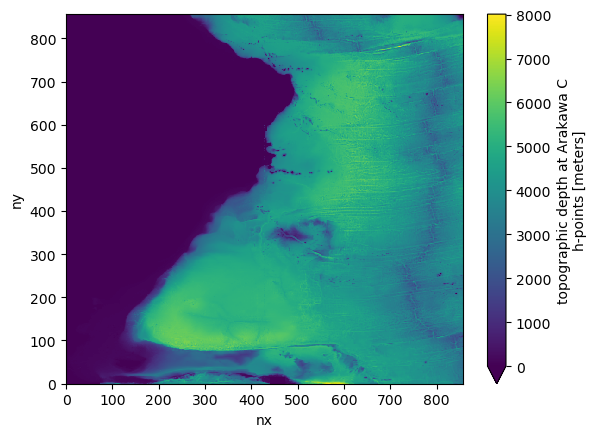

In [213]:
topo=xr.open_dataset('outputs_edited/ocean_topog.nc')
Omask=xr.open_dataset('outputs_edited/ocean_mask.nc')
Lmask=xr.open_dataset('outputs_edited/land_mask.nc')
topo.depth.plot(vmin=0)

In [214]:
#https://github.com/raphaeldussin/om4labs/blob/b62fb4ca85516997911f024b236087b61d65a039/om4labs/m6toolbox.py#L173
def ice9(i, j, source, xcyclic=True, tripolar=True):
    """
    An iterative (stack based) implementation of "Ice 9".
    The flood fill starts at [j,i] and treats any positive value of "source" as
    passable. Zero and negative values block flooding.
    xcyclic = True allows cyclic behavior in the last index. (default)
    tripolar = True allows a fold across the top-most edge. (default)
    Returns an array of 0's and 1's.
    """
    wetMask = 0 * source
    (nj, ni) = wetMask.shape
    stack = set()
    stack.add((j, i))
    while stack:
        (j, i) = stack.pop()
        if wetMask[j, i] or source[j, i] <= 0:
            continue
        wetMask[j, i] = 1
        if i > 0:
            stack.add((j, i - 1))
        elif xcyclic:
            stack.add((j, ni - 1))
        if i < ni - 1:
            stack.add((j, i + 1))
        elif xcyclic:
            stack.add((j, 0))
        if j > 0:
            stack.add((j - 1, i))
        if j < nj - 1:
            stack.add((j + 1, i))
        elif tripolar:
            stack.add((j, ni - 1 - i))  # Tri-polar fold
    return wetMask

In [216]:
new_mask=ice9(232,312,Omask.mask.data,False,False)

<xarray.DataArray 'mask' (ny: 857, nx: 857)>
array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])
Dimensions without coordinates: ny, nx


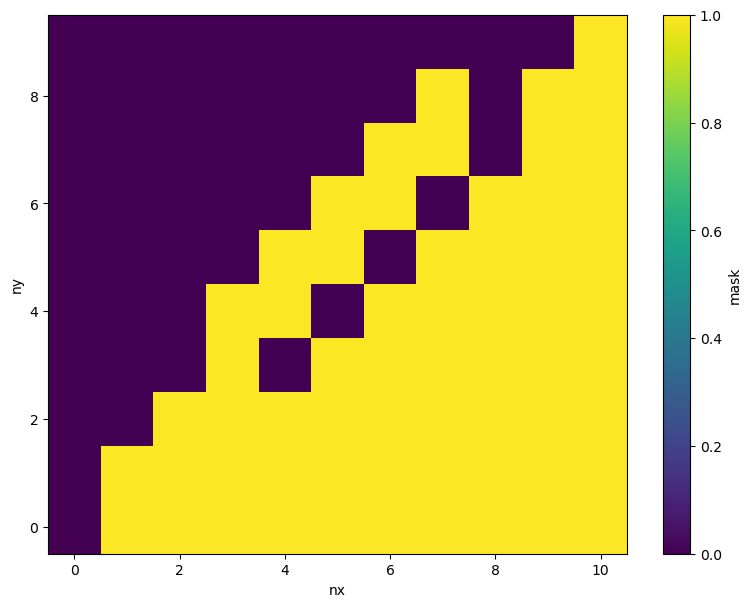

In [223]:
newOmask=xr.DataArray(new_mask, coords=Omask.coords ,name = "mask")
print(newOmask)
newOmask.isel(nx=slice(225,236),ny=slice(305,315)).plot(vmin=0,vmax=1,size=7)

# 425 j= 531 

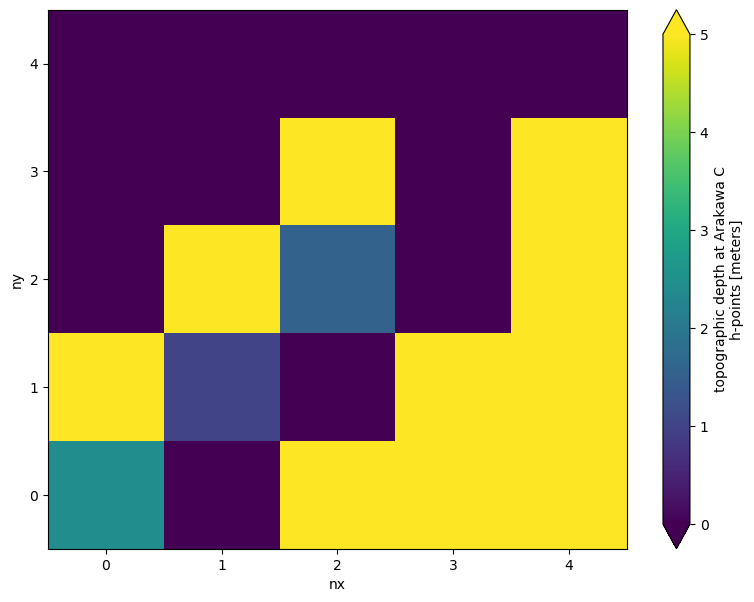

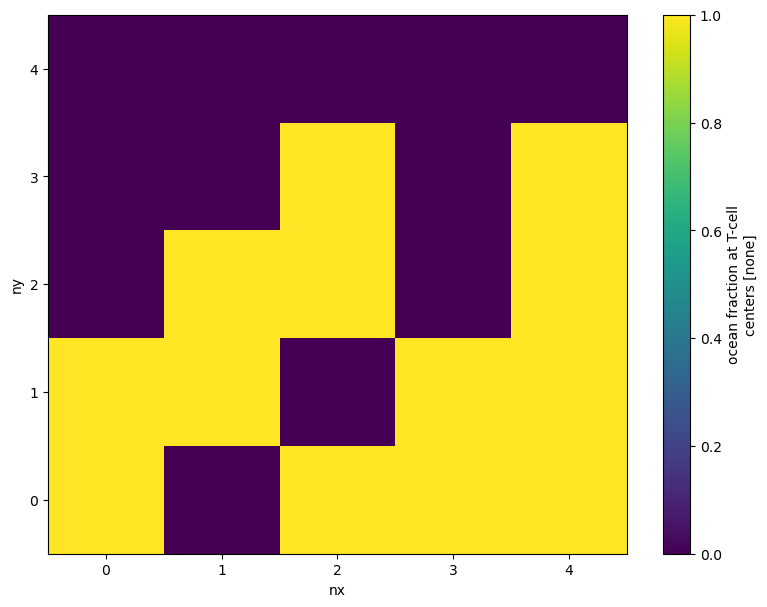

In [207]:
x = 232; y = 312

topo.depth.isel(nx=slice(x-2,x+3),ny=slice(y-2,y+3)).plot(vmin=0,vmax=
                                                          5,size=7)
Omask.mask.isel(nx=slice(x-2,x+3),ny=slice(y-2,y+3)).plot(vmin=0,vmax=1,size=7)

# 425 j= 531 

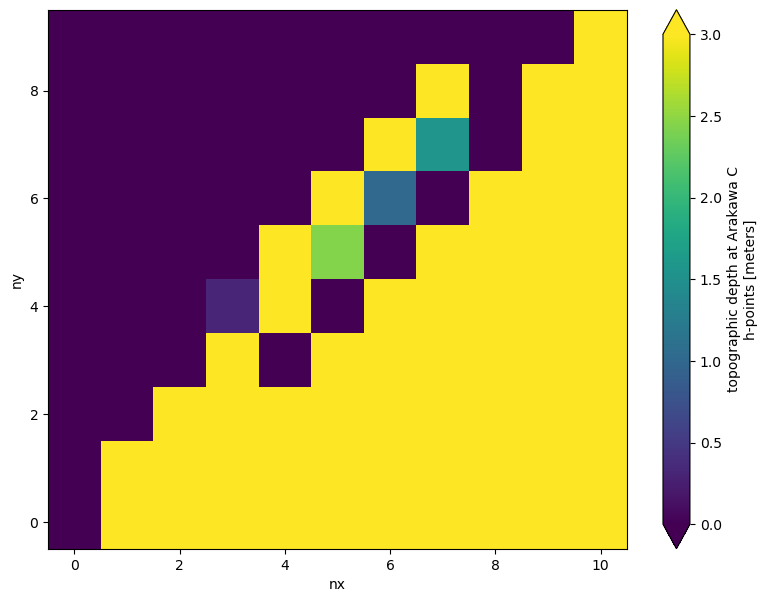

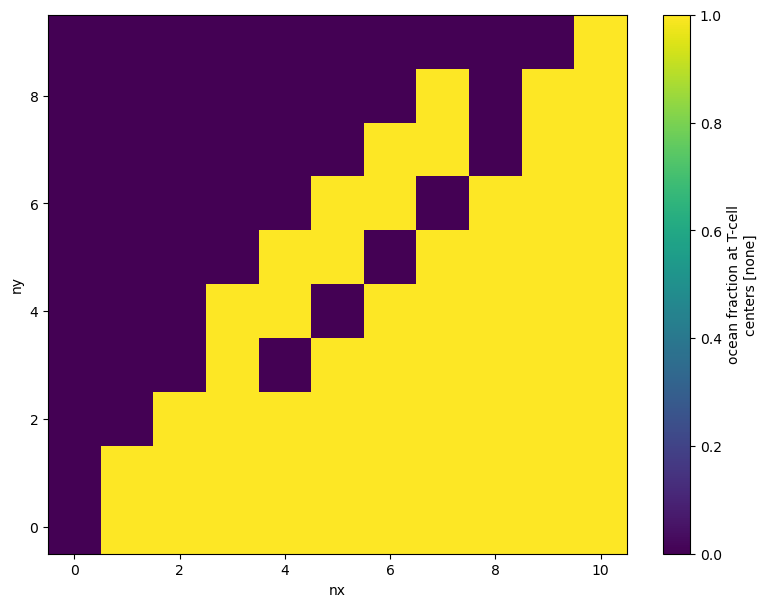

In [211]:

topo.depth.isel(nx=slice(225,236),ny=slice(305,315)).plot(vmin=0,vmax=
                                                          3,size=7)
Omask.mask.isel(nx=slice(225,236),ny=slice(305,315)).plot(vmin=0,vmax=1,size=7)

# 425 j= 531 

1.5625
1
topo.depth.loc[dict(nx=232,ny=312)]
Omask.mask.loc[dict(nx=232,ny=312)]
Lmask.mask.loc[dict(nx=232,ny=312)]


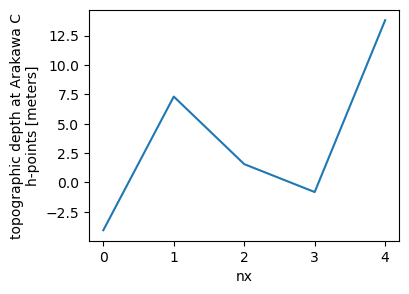

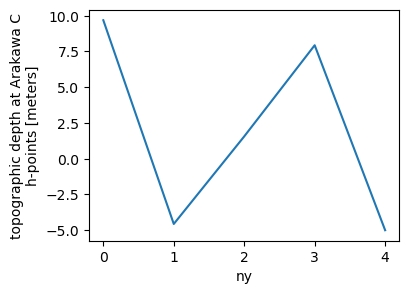

In [224]:

x = 232; y = 312
print(topo.depth.isel(nx=x,ny=y).data)
print(Omask.mask.isel(nx=x,ny=y).data)

print(f"topo.depth.loc[dict(nx={x},ny={y})]")
print(f"Omask.mask.loc[dict(nx={x},ny={y})]")
print(f"Lmask.mask.loc[dict(nx={x},ny={y})]")

topo.depth.isel(nx=slice(x-2,x+3),ny=y).plot(size=3)
topo.depth.isel(nx=x,ny=slice(y-2,y+3)).plot(size=3)

In [199]:
topo.depth.loc[dict(nx=104,ny=217)]=18
topo.depth.loc[dict(nx=399,ny=477)]=14.375
topo.depth.loc[dict(nx=244,ny=328)]=10.375
topo.depth.loc[dict(nx=245,ny=329)]=10.375
topo.depth.loc[dict(nx=171,ny=271)]=8.375
topo.depth.loc[dict(nx=171,ny=271)]=8.375
topo.depth.loc[dict(nx=111,ny=186)]=67.9375
topo.depth.loc[dict(nx=113,ny=217)]=27.6875
topo.depth.loc[dict(nx=56 ,ny=165)]=17
topo.depth.loc[dict(nx=300,ny=776)]=5


topo.depth.loc[dict(nx=306,ny=776)]=-5
Omask.mask.loc[dict(nx=306,ny=776)]=0.0
Lmask.mask.loc[dict(nx=306,ny=776)]=1.0

topo.depth.loc[dict(nx=313,ny=774)]=-5
Omask.mask.loc[dict(nx=313,ny=774)]=0.0
Lmask.mask.loc[dict(nx=313,ny=774)]=1.0

topo.depth.loc[dict(nx=382,ny=745)]=-5
Omask.mask.loc[dict(nx=382,ny=745)]=0.0
Lmask.mask.loc[dict(nx=382,ny=745)]=1.0

topo.depth.loc[dict(nx=405,ny=744)]=-5
Omask.mask.loc[dict(nx=405,ny=744)]=0.0
Lmask.mask.loc[dict(nx=405,ny=744)]=1.0

topo.depth.loc[dict(nx=412,ny=744)]=-5
Omask.mask.loc[dict(nx=412,ny=744)]=0.0
Lmask.mask.loc[dict(nx=412,ny=744)]=1.0

topo.depth.loc[dict(nx=336,ny=765)]=-5
Omask.mask.loc[dict(nx=336,ny=765)]=0.0
Lmask.mask.loc[dict(nx=336,ny=765)]=1.0

topo.depth.loc[dict(nx=344,ny=764)]=8
topo.depth.loc[dict(nx=345,ny=763)]=8

topo.depth.loc[dict(nx=321,ny=442)]=-8
Omask.mask.loc[dict(nx=321,ny=442)]=0.0 #make land point
Lmask.mask.loc[dict(nx=321,ny=442)]=1.0

Omask.mask.loc[dict(nx=418,ny=514)]=1.0 #make ocean point
Lmask.mask.loc[dict(nx=418,ny=514)]=0.0

topo.depth.loc[dict(nx=425,ny=532)]=5
Omask.mask.loc[dict(nx=425,ny=532)]=1.0 #make ocean point
Lmask.mask.loc[dict(nx=425,ny=532)]=0.0

topo.depth.loc[dict(nx=487,ny=675)]=-8
Omask.mask.loc[dict(nx=487,ny=675)]=0.0 #make land point
Lmask.mask.loc[dict(nx=487,ny=675)]=1.0

topo.depth.loc[dict(nx=291,ny=411)]=8

topo.depth.loc[dict(nx=296,ny=423)]=-8
Omask.mask.loc[dict(nx=296,ny=423)]=0.0
Lmask.mask.loc[dict(nx=296,ny=423)]=1.0
topo.depth.loc[dict(nx=296,ny=421)]=5
topo.depth.loc[dict(nx=305,ny=431)]=5

topo.depth.loc[dict(nx=460,ny=712)]=-8
Omask.mask.loc[dict(nx=460,ny=712)]=0.0
Lmask.mask.loc[dict(nx=460,ny=712)]=1.0

topo.depth.loc[dict(nx=461,ny=712)]=-8
Omask.mask.loc[dict(nx=461,ny=712)]=0.0
Lmask.mask.loc[dict(nx=461,ny=712)]=1.0

topo.depth.loc[dict(nx=430,ny=594)]=70.0

topo.depth.loc[dict(nx=468,ny=639)]=5
topo.depth.loc[dict(nx=265,ny=348)]=5

topo.depth.loc[dict(nx=271,ny=361)]=8
topo.depth.loc[dict(nx=98,ny=219)]=5
topo.depth.loc[dict(nx=98,ny=218)]=6

topo.depth.loc[dict(nx=99,ny=226)]=5
Omask.mask.loc[dict(nx=99,ny=226)]=1.0
Lmask.mask.loc[dict(nx=99,ny=226)]=0.0

topo.depth.loc[dict(nx=101,ny=225)]=5
Omask.mask.loc[dict(nx=101,ny=225)]=1.0
Lmask.mask.loc[dict(nx=101,ny=225)]=0.0

topo.depth.loc[dict(nx=367,ny=460)]=-8
Omask.mask.loc[dict(nx=367,ny=460)]=0.0
Lmask.mask.loc[dict(nx=367,ny=460)]=1.0

topo.depth.loc[dict(nx=369,ny=460)]=-8
Omask.mask.loc[dict(nx=369,ny=460)]=0.0
Lmask.mask.loc[dict(nx=369,ny=460)]=1.0

topo.depth.loc[dict(nx=359,ny=457)]=-8
Omask.mask.loc[dict(nx=359,ny=457)]=0.0
Lmask.mask.loc[dict(nx=359,ny=457)]=1.0

topo.depth.loc[dict(nx=365,ny=456)]=-8
Omask.mask.loc[dict(nx=365,ny=456)]=0.0
Lmask.mask.loc[dict(nx=365,ny=456)]=1.0

topo.depth.loc[dict(nx=347,ny=451)]=-8
Omask.mask.loc[dict(nx=347,ny=451)]=0.0
Lmask.mask.loc[dict(nx=347,ny=451)]=1.0

topo.depth.loc[dict(nx=71,ny=176)]=-8
Omask.mask.loc[dict(nx=71,ny=176)]=0.0
Lmask.mask.loc[dict(nx=71,ny=176)]=1.0

topo.depth.loc[dict(nx=66,ny=181)]=8
Omask.mask.loc[dict(nx=66,ny=181)]=1.0
Lmask.mask.loc[dict(nx=66,ny=181)]=0.0

topo.depth.loc[dict(nx=66,ny=171)]=30
Omask.mask.loc[dict(nx=66,ny=171)]=1.0
Lmask.mask.loc[dict(nx=66,ny=171)]=0.0

In [93]:
#topo.depth.isel(ny=slice(100,120),nx=slice(180,220)).plot(vmin=0,vmax=8000, size=10)

In [8]:
topog2=topo.assign_coords(ntiles=('ntiles',[1]))
topog2.to_netcdf('ocean_topog.nc', mode='w', format='NETCDF3_64BIT')
Lmask.to_netcdf("land_mask.nc", mode='w', format='NETCDF3_64BIT')
Omask.to_netcdf("ocean_mask.nc", mode='w', format='NETCDF3_64BIT')

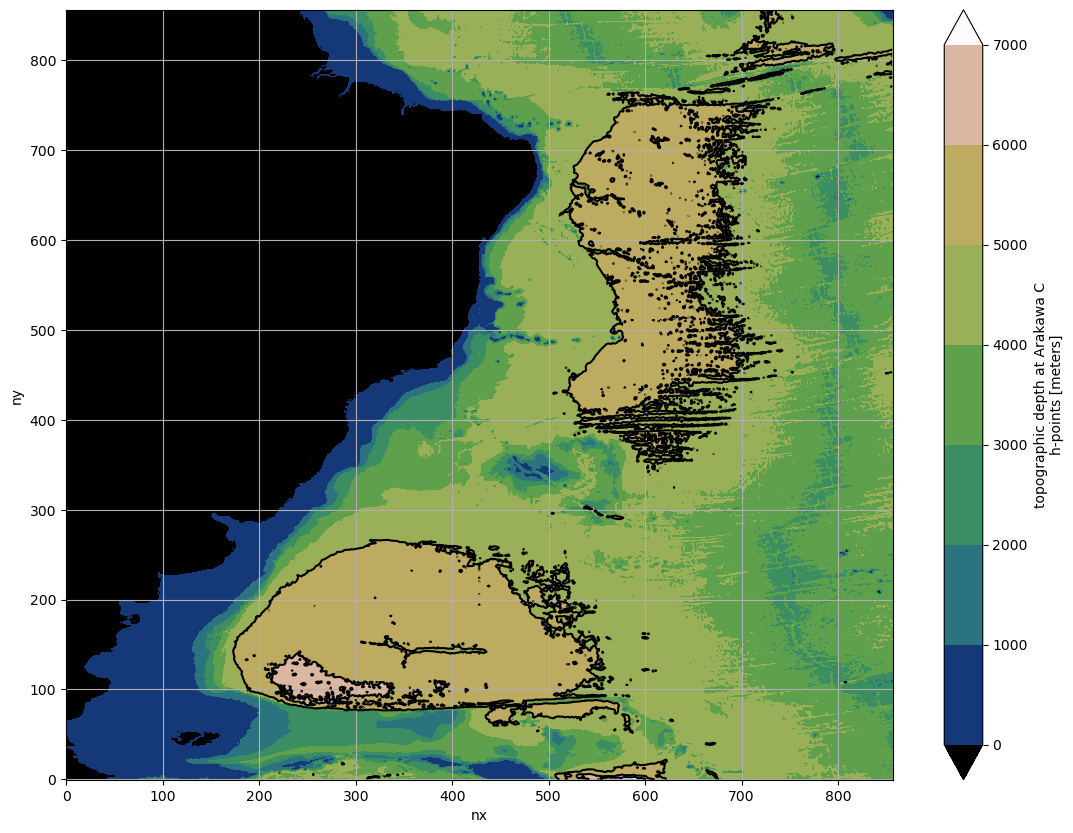

In [7]:
#plot topog.fixed
import matplotlib.pyplot as plt
import numpy as np
p=topo.depth.plot( size=10, cmap= 'gist_earth', levels=np.arange(0,8000,1000))
#p=topo.depth.isel(ny=slice(0,300),nx=slice(0,300)).plot(vmin=0,vmax=20, size=10)
plt.contour(topo.depth,colors='k',levels=np.arange(5000,8000,1000))
p.axes.grid()
plt.savefig('fix_bathy.png')